# Linear Regression

This example uses housing price data from King County, WA that includes Seattle. The data is publically available on [Kaggle](https://www.kaggle.com/prabin96/predict-housing-prices/data).

Linear regression is perhaps the simplest of all models. Given a set a set of input values and expected values, a linear equation of this form can fit that data:

$$y = a_1 x + a_0$$

In this case, x represents the living area of a particular house, and y represents it's sale price. The goal of linear regression is to compute the slope $a_1$ and y-intercept $a_0$ that minimizes error.

This could be considered a kind of learning, where a machine is learning the values for $a_1$ and $a_0$ given a set of training data. Once trained, the model can be used to predict the value of a house in King County given the amount of living area.

In [0]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
!wget https://raw.githubusercontent.com/msiddalingaiah/MachineLearning/master/Regression/data/kc_house_data.csv -O kc_house_data.csv

--2020-03-01 22:44:36--  https://raw.githubusercontent.com/msiddalingaiah/MachineLearning/master/Regression/data/kc_house_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2515206 (2.4M) [text/plain]
Saving to: ‘kc_house_data.csv’

kc_house_data.csv   100%[===================>]   2.40M  --.-KB/s    in 0.05s   

2020-03-01 22:44:36 (47.6 MB/s) - ‘kc_house_data.csv’ saved [2515206/2515206]



In [3]:
# Load data and view the first 5 rows
data = pd.read_csv("kc_house_data.csv")

data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
space = data['sqft_living']
price = data['price']

# Change X into 2D array   
X = np.array(space).reshape(-1, 1)
Y = np.array(price)

# Split data into train sets and test sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=1/3,random_state=0)

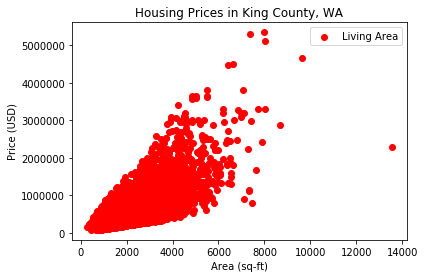

In [5]:
# Visualize training set
plt.scatter(X_train,Y_train,color="red",label="Living Area")
plt.title("Housing Prices in King County, WA")
plt.xlabel("Area (sq-ft)")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

In [0]:
# Train
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

# Prediction
y_pred = regressor.predict(X_test)

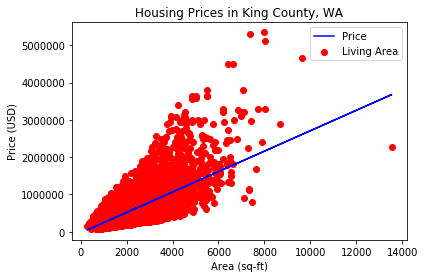

In [7]:
# Visualize training set
plt.scatter(X_train,Y_train,color="red",label="Living Area")
plt.title("Housing Prices in King County, WA")
plt.plot(X_train,regressor.predict(X_train),color="blue",label="Price")
plt.xlabel("Area (sq-ft)")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

In [8]:
area = 2400

price = regressor.predict([[area]])

print('House of %d sq-ft costs about $%d' % (area, price))

House of 2400 sq-ft costs about $628084


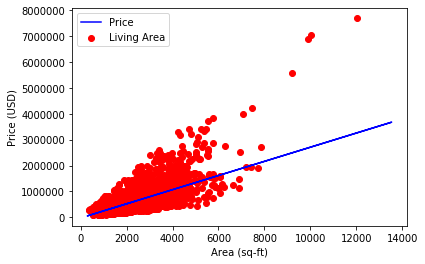

In [9]:
# Visualize test set
plt.scatter(X_test,Y_test,color='red',label="Living Area")
plt.plot(X_train,regressor.predict(X_train),color="blue",label="Price")
plt.xlabel("Area (sq-ft)")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()